In [2]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import scipy.sparse
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight

In [3]:
data = "C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\scGNN_matrix.h5ad"

In [4]:
adata = sc.read_h5ad(data)
print('X matrix is sparse:', scipy.sparse.issparse(adata.X))
print('X size =', adata.X.shape)

X matrix is sparse: False
X size = (2000, 8013)


In [5]:
adata

AnnData object with n_obs × n_vars = 2000 × 8013
    obs: 'my_clust_1'

In [6]:
print(adata.X)
print(adata.X.shape)
print(type(adata.X))
print(adata.X.dtype)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.23346782 0.01299769 0.08607478 ... 0.08972513 0.         0.2212397 ]
 [0.2330591  0.         0.00645433 ... 0.         0.         0.22836858]
 [0.29366922 0.         0.05959742 ... 0.1592918  0.01173312 0.2759499 ]]
(2000, 8013)
<class 'numpy.ndarray'>
float32


In [7]:
cluster_type = 'my_clust_1'

In [8]:
adata.obs[cluster_type]

TGCGTGGCATGACATC_sc69_1     5
CAACCTCAGCTCTCGG_sc69_1     5
TCGTACCCATCCCATC_sc72_1     5
GTACTTTTCTAACGGT_sc69_1     5
CCTAAAGCATAACCTG_sc72_1     5
                           ..
TTCTTAGTCTCGAGTA_sc72_1     5
CATATGGCACACCGCA_sc69_1    17
CTCCTAGGTTGGTAAA_sc69_1    17
GGGTCTGAGGGCATGT_sc69_1    17
CCTTCCCCACCTCGTT_sc69_1    17
Name: my_clust_1, Length: 2000, dtype: category
Categories (30, object): ['0', '10', '11', '11b', ..., '7c', '8', '9', '9b']

In [9]:
annotation_dict= {
    '9': 'CAP1',
    '24': 'CAP2',
    '9b': 'VEC',
    '27': 'LEC',
        
    '17': 'Ciliated',
    '15': 'Secretory',
    '22': 'AT1',
    '6': 'AT2',
    '12': 'AT2-t1',
    '19': 'AT2-t2',
        
    '14': 'AF',
    '25': 'Pericyte',
        
    '20': 'Mesothelial',
        
    '3': 'B1',
    '3b': 'B2',
        
    '0': 'Th1',
    '8': 'Tnaive',
    '11': 'Tex',
    '77': 'Treg',
        
    '11b': 'NK',
        
    '4a': 'AM',
    '4': 'M-t1',
    '10': 'M-lc',
    '7': 'M-t2',
    '7b': 'M-C1q',
    '7c': 'iMon',
        
    '23': 'pDC',
    '13': 'DC',
    '5b': 'N1',
    '5': 'N2',
}

In [10]:
adata.obs['cell_type_edit'] = [annotation_dict[clust] for clust in adata.obs[cluster_type]]

dict_list = list(annotation_dict.keys())
adata_list = list(adata.obs[cluster_type].unique())
print('Keys in dictionary not in adata:', [item for item in dict_list if item not in adata_list] )
print('Keys in adata not in dictionary:', [item for item in adata_list if item not in dict_list] )

Keys in dictionary not in adata: ['24', '27', '12', '19', '3', '3b', '8', '11', '77', '11b', '4a', '4', '7b', '23', '13']
Keys in adata not in dictionary: []


In [11]:
adata.obs['cell_type_edit']

TGCGTGGCATGACATC_sc69_1          N2
CAACCTCAGCTCTCGG_sc69_1          N2
TCGTACCCATCCCATC_sc72_1          N2
GTACTTTTCTAACGGT_sc69_1          N2
CCTAAAGCATAACCTG_sc72_1          N2
                             ...   
TTCTTAGTCTCGAGTA_sc72_1          N2
CATATGGCACACCGCA_sc69_1    Ciliated
CTCCTAGGTTGGTAAA_sc69_1    Ciliated
GGGTCTGAGGGCATGT_sc69_1    Ciliated
CCTTCCCCACCTCGTT_sc69_1    Ciliated
Name: cell_type_edit, Length: 2000, dtype: object

In [12]:
unique_celltype_sub = adata.obs['cell_type_edit'].unique()
print(unique_celltype_sub)

num_unique_celltype_sub = adata.obs['cell_type_edit'].nunique()
print(f"Number of unique sub cell types: {num_unique_celltype_sub}")

['N2' 'M-lc' 'N1' 'Mesothelial' 'iMon' 'Ciliated' 'CAP1' 'M-t2' 'Th1'
 'Secretory' 'AF' 'VEC' 'Pericyte' 'AT1' 'AT2']
Number of unique sub cell types: 15


In [13]:
replacement_dict = {
    'N2': 0,
    'M-lc': 1,
    'N1': 2,
    'Mesothelial': 3,
    'iMon': 4,
    'Ciliated': 5,
    'CAP1': 6,
    'M-t2': 7,
    'Th1': 8,
    'Secretory': 9,
    'AF': 10,
    'VEC': 11,
    'Pericyte': 12,
    'AT1': 13,
    'AT2': 14
}

In [14]:
adata.obs['celltype'] = adata.obs['cell_type_edit'].replace(replacement_dict)

C:\Users\bence\AppData\Local\Temp\ipykernel_166084\975682991.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adata.obs['celltype'] = adata.obs['cell_type_edit'].replace(replacement_dict)


In [15]:
adata.obs['celltype']

TGCGTGGCATGACATC_sc69_1    0
CAACCTCAGCTCTCGG_sc69_1    0
TCGTACCCATCCCATC_sc72_1    0
GTACTTTTCTAACGGT_sc69_1    0
CCTAAAGCATAACCTG_sc72_1    0
                          ..
TTCTTAGTCTCGAGTA_sc72_1    0
CATATGGCACACCGCA_sc69_1    5
CTCCTAGGTTGGTAAA_sc69_1    5
GGGTCTGAGGGCATGT_sc69_1    5
CCTTCCCCACCTCGTT_sc69_1    5
Name: celltype, Length: 2000, dtype: int64

In [16]:
print("Unique values in 'celltype' column after replacement:", adata.obs['celltype'].unique())

Unique values in 'celltype' column after replacement: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [17]:
cell_type_counts = adata.obs['cell_type_edit'].value_counts()

print("Number of cells in each cell type:")
print(cell_type_counts)

Number of cells in each cell type:
cell_type_edit
N2             1700
N1              143
Pericyte         36
CAP1             28
M-lc             26
Ciliated         20
AF               15
AT1               8
AT2               8
Mesothelial       5
VEC               4
Secretory         3
M-t2              2
iMon              1
Th1               1
Name: count, dtype: int64


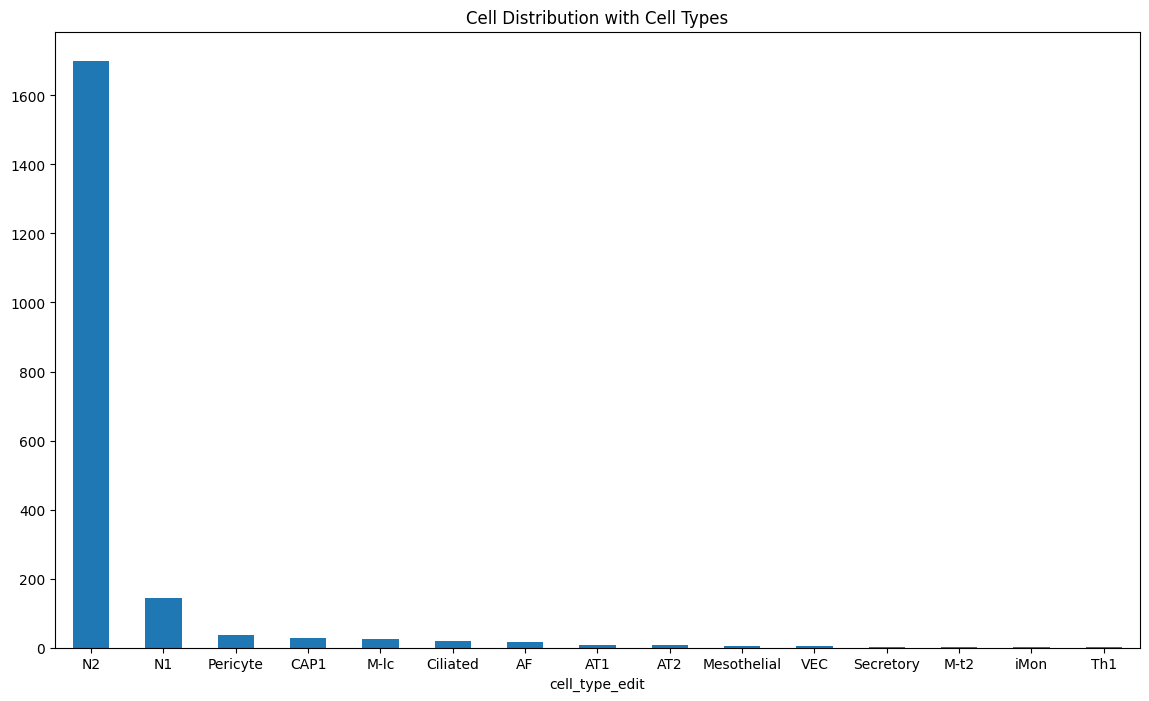

In [20]:
# cell distribution with cell types
y = adata.obs['cell_type_edit']
plt.figure(figsize=(14, 8))
plt.title('Cell Distribution with Cell Types')
y.value_counts().plot(kind='bar', rot=0)
plt.show()

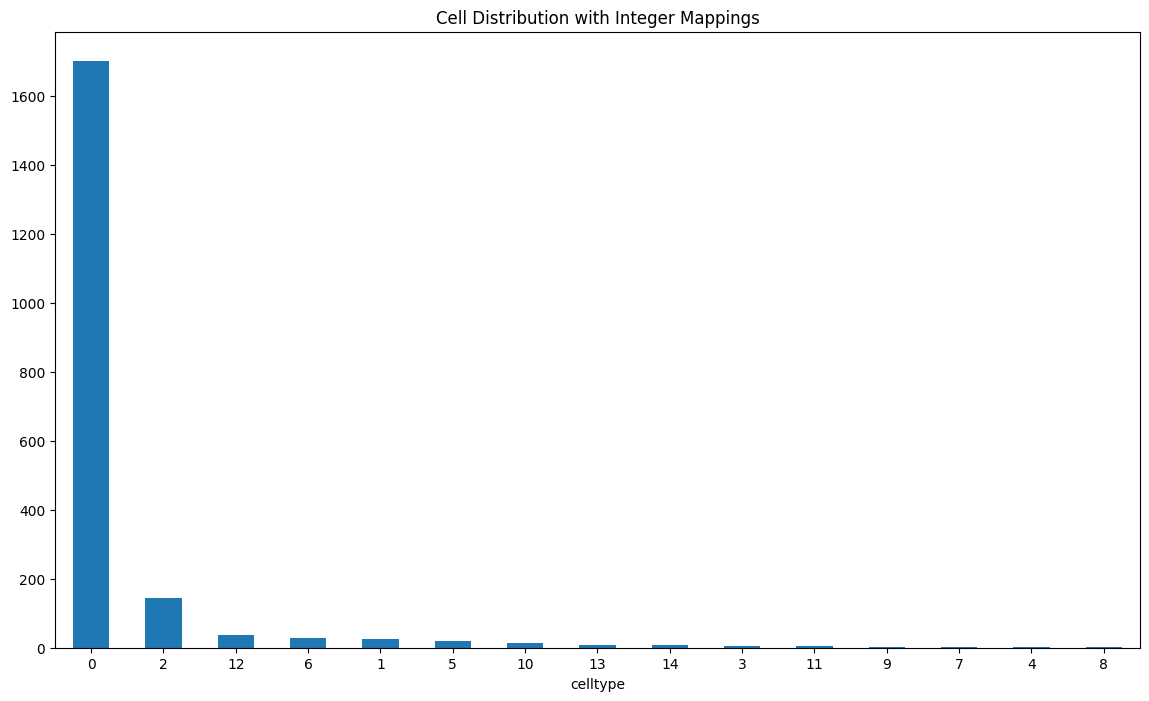

In [19]:
# cell distribution with int mappings
y = adata.obs['celltype']
plt.figure(figsize=(14, 8))
plt.title('Cell Distribution with Integer Mappings')
y.value_counts().plot(kind='bar', rot=0)
plt.show()

In [22]:
X = adata.X
y = adata.obs['celltype'].values

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state=14)
train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size = 0.25, random_state=17)

train_features = np.array(train_features)
test_features = np.array(test_features)
val_features = np.array(val_features)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=train_labels
)

print('Sample weights shape:', sample_weights.shape)

np.save('../Arrays/train_features_scgnn.npy', train_features)
np.save('../Arrays/test_features_scgnn.npy', test_features)
np.save('../Arrays/val_features_scgnn.npy', val_features)
np.save('../Arrays/train_labels_scgnn.npy', train_labels)
np.save('../Arrays/test_labels_scgnn.npy', test_labels)
np.save('../Arrays/val_labels_scgnn.npy', val_labels)
np.save('../Arrays/sample_weights_scgnn.npy', sample_weights)

Training features shape: (1200, 8013)
Validation features shape: (400, 8013)
Test features shape: (400, 8013)
Training labels shape: (1200,)
Validation labels shape: (400,)
Test labels shape: (400,)
Sample weights shape: (1200,)
